# AI Agent Adoption Analysis Plan

## Major Assumptions
Analysis compares AI agent adoption for expense automation between Ramp and Brex platforms. We assume both databases contain comparable metrics for AI agent usage including adoption timestamps, auto-resolution outcomes, query categorization, and confidence scores. Monthly trends will be analyzed over a consistent time period available in both datasets, with query types standardized across platforms for meaningful comparison.

## Plan
- [ ] Data collection and platform comparison setup
  - [ ] Query Ramp and Brex databases for AI agent usage metrics (adoption dates, resolution outcomes, query types, confidence scores)
  - [ ] Standardize query type categories and time periods across both platforms
- [ ] Calculate adoption and performance metrics
  - [ ] Compute monthly AI agent adoption trends by platform
  - [ ] Calculate auto-resolution rates segmented by query type for each platform
- [ ] Analyze confidence score distributions and synthesize findings
  - [ ] Compare confidence score distributions between Ramp and Brex
  - [ ] Visualize platform differences and summarize competitive insights

In [2]:
# AI Agent Adoption Trends for Expense Automation
# Comparing Ramp and Brex platforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

# SignalPilot dark theme style setup
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': '#08070e',
    'axes.facecolor': '#12101e',
    'axes.edgecolor': '#272336',
    'axes.labelcolor': '#e9eaeb',
    'text.color': '#FAFAFA',
    'xtick.color': '#a4a7ae',
    'ytick.color': '#a4a7ae',
    'grid.color': '#1d182b',
    'legend.facecolor': '#12101e',
    'legend.edgecolor': '#272336',
    'legend.labelcolor': '#e9eaeb',
    'savefig.facecolor': '#08070e',
})

COLORS = {
    'primary': '#c4b5fd',
    'secondary': '#ff8dc4',
    'tertiary': '#8b5cf6',
    'blue': '#73acfb',
    'green': '#4ca86f',
}
CATEGORICAL_PALETTE = ['#c4b5fd', '#ff8dc4', '#8b5cf6', '#73acfb', '#fec163', '#4ca86f']

# Connect to databases
ramp_engine = create_engine(os.environ['RAMP_CONNECTION_URL'])
brex_engine = create_engine(os.environ['BREX_CONNECTION_URL'])

# Load Ramp AI queries
ramp_query = """
SELECT 
    id,
    company_id,
    query_type,
    resolution,
    query_at::timestamp as query_at,
    response_time_sec,
    status
FROM ai_queries
"""
ramp_df = pd.read_sql(ramp_query, ramp_engine)
ramp_df['query_at'] = pd.to_datetime(ramp_df['query_at'])
ramp_df['month'] = ramp_df['query_at'].dt.to_period('M')
ramp_df['platform'] = 'Ramp'

# Load Brex AI expense events
brex_query = """
SELECT 
    id,
    account_id,
    event_type,
    resolution,
    expense_amount_usd,
    created_at::timestamp as created_at,
    processing_time_sec,
    confidence_score
FROM ai_expense_events
"""
brex_df = pd.read_sql(brex_query, brex_engine)
brex_df['created_at'] = pd.to_datetime(brex_df['created_at'])
brex_df['month'] = brex_df['created_at'].dt.to_period('M')
brex_df['platform'] = 'Brex'

print(f"Ramp AI Queries: {len(ramp_df):,}")
print(f"Brex AI Expense Events: {len(brex_df):,}")

Ramp AI Queries: 25,000
Brex AI Expense Events: 35,000


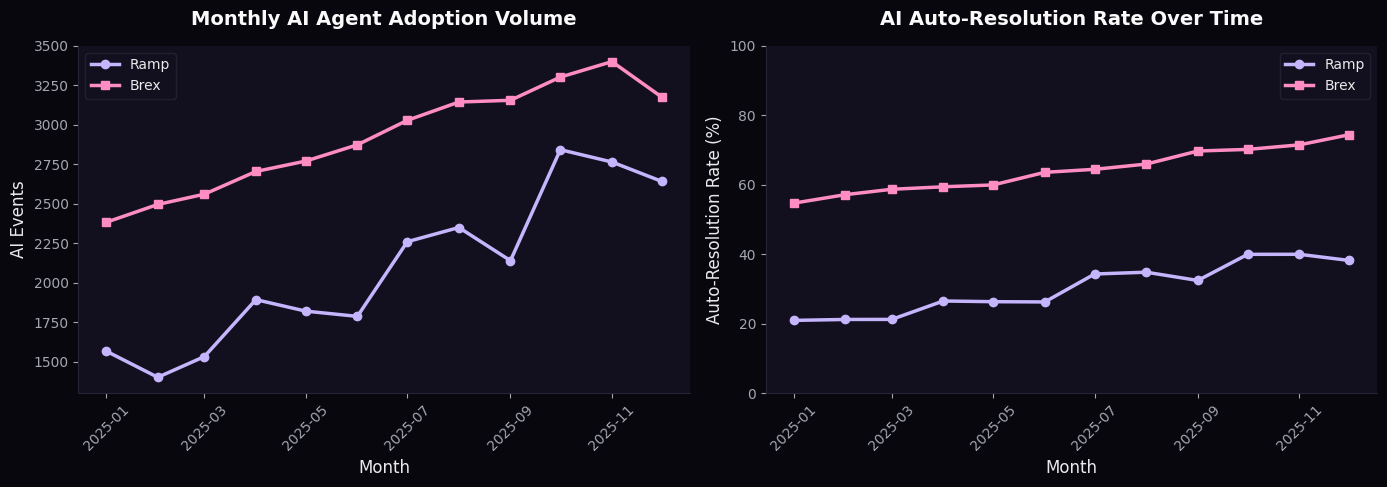

In [3]:
# Monthly AI Agent Adoption Trends
ramp_monthly = ramp_df.groupby('month').agg(
    total_queries=('id', 'count'),
    auto_resolved=('resolution', lambda x: (x == 'auto_resolved').sum()),
    unique_companies=('company_id', 'nunique')
).reset_index()
ramp_monthly['auto_resolution_rate'] = ramp_monthly['auto_resolved'] / ramp_monthly['total_queries'] * 100
ramp_monthly['month_dt'] = ramp_monthly['month'].dt.to_timestamp()

brex_monthly = brex_df.groupby('month').agg(
    total_events=('id', 'count'),
    auto_resolved=('resolution', lambda x: (x == 'auto').sum()),
    unique_accounts=('account_id', 'nunique'),
    avg_confidence=('confidence_score', 'mean')
).reset_index()
brex_monthly['auto_resolution_rate'] = brex_monthly['auto_resolved'] / brex_monthly['total_events'] * 100
brex_monthly['month_dt'] = brex_monthly['month'].dt.to_timestamp()

# Plot adoption trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Volume trends
ax1 = axes[0]
ax1.plot(ramp_monthly['month_dt'], ramp_monthly['total_queries'], 
         color=COLORS['primary'], linewidth=2.5, marker='o', markersize=6, label='Ramp')
ax1.plot(brex_monthly['month_dt'], brex_monthly['total_events'], 
         color=COLORS['secondary'], linewidth=2.5, marker='s', markersize=6, label='Brex')
ax1.set_xlabel('Month')
ax1.set_ylabel('AI Events')
ax1.set_title('Monthly AI Agent Adoption Volume', fontweight='bold', pad=15)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Right: Auto-resolution rate trends
ax2 = axes[1]
ax2.plot(ramp_monthly['month_dt'], ramp_monthly['auto_resolution_rate'], 
         color=COLORS['primary'], linewidth=2.5, marker='o', markersize=6, label='Ramp')
ax2.plot(brex_monthly['month_dt'], brex_monthly['auto_resolution_rate'], 
         color=COLORS['secondary'], linewidth=2.5, marker='s', markersize=6, label='Brex')
ax2.set_xlabel('Month')
ax2.set_ylabel('Auto-Resolution Rate (%)')
ax2.set_title('AI Auto-Resolution Rate Over Time', fontweight='bold', pad=15)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

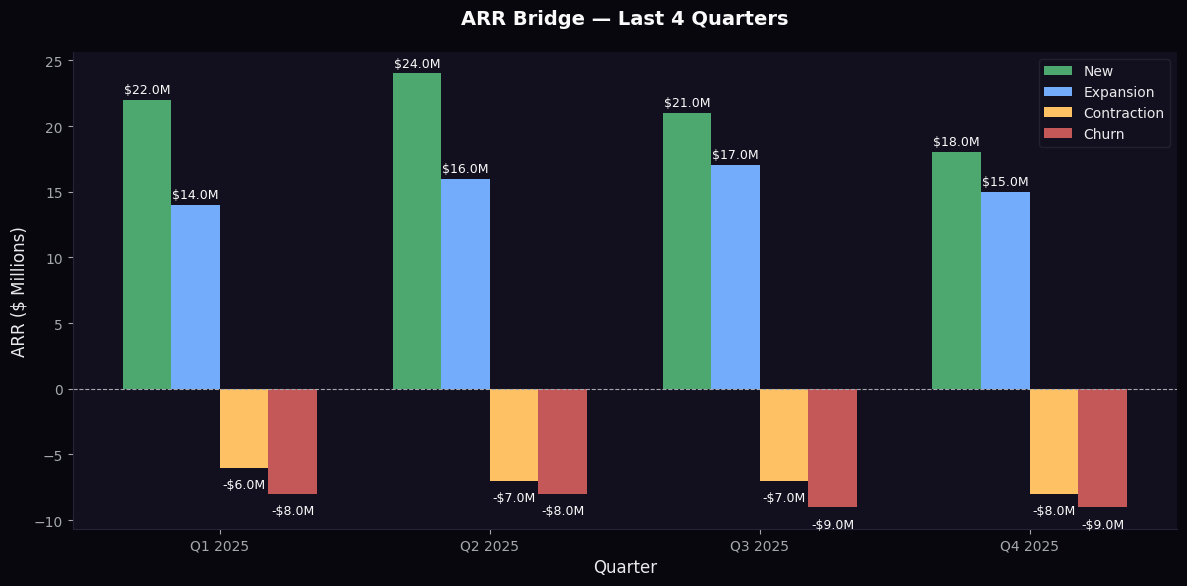


📊 ARR Bridge Summary ($ Millions)
          New  Expansion  Contraction  Churn  Net Change
quarter                                                 
Q1 2025  22.0       14.0         -6.0   -8.0        22.0
Q2 2025  24.0       16.0         -7.0   -8.0        25.0
Q3 2025  21.0       17.0         -7.0   -9.0        22.0
Q4 2025  18.0       15.0         -8.0   -9.0        16.0


In [5]:
# ARR Bridge Analysis - Last 4 Quarters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

# SignalPilot dark theme
plt.rcParams.update({
    'figure.facecolor': '#08070e', 'axes.facecolor': '#12101e', 'axes.edgecolor': '#272336',
    'axes.labelcolor': '#e9eaeb', 'text.color': '#FAFAFA', 'xtick.color': '#a4a7ae',
    'ytick.color': '#a4a7ae', 'grid.color': '#1d182b', 'legend.facecolor': '#12101e',
    'legend.edgecolor': '#272336', 'legend.labelcolor': '#e9eaeb', 'savefig.facecolor': '#08070e',
    'axes.spines.top': False, 'axes.spines.right': False
})

brex_engine = create_engine(os.environ['BREX_CONNECTION_URL'])

# Load ARR quarterly data
arr_df = pd.read_sql("SELECT * FROM arr_quarterly", brex_engine)

# Aggregate by quarter and movement type
arr_bridge = arr_df.groupby(['quarter', 'movement_type'])['amount_usd'].sum().reset_index()
arr_bridge_pivot = arr_bridge.pivot(index='quarter', columns='movement_type', values='amount_usd').fillna(0)

# Sort quarters chronologically
quarter_order = ['Q1 2025', 'Q2 2025', 'Q3 2025', 'Q4 2025']
arr_bridge_pivot = arr_bridge_pivot.reindex([q for q in quarter_order if q in arr_bridge_pivot.index])

# Convert to millions
arr_bridge_m = arr_bridge_pivot / 1e6

# Calculate net change per quarter
arr_bridge_m['net_change'] = arr_bridge_m.sum(axis=1)

# Create waterfall-style ARR bridge chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(arr_bridge_m))
width = 0.18

colors = {'new': '#4ca86f', 'expansion': '#73acfb', 'contraction': '#fec163', 'churn': '#c45757'}

bars_new = ax.bar(x - 1.5*width, arr_bridge_m['new'], width, label='New', color=colors['new'])
bars_exp = ax.bar(x - 0.5*width, arr_bridge_m['expansion'], width, label='Expansion', color=colors['expansion'])
bars_con = ax.bar(x + 0.5*width, arr_bridge_m['contraction'], width, label='Contraction', color=colors['contraction'])
bars_churn = ax.bar(x + 1.5*width, arr_bridge_m['churn'], width, label='Churn', color=colors['churn'])

# Add value labels
for bars in [bars_new, bars_exp, bars_con, bars_churn]:
    for bar in bars:
        height = bar.get_height()
        label = f'${height:.1f}M' if height >= 0 else f'-${abs(height):.1f}M'
        y_pos = height + 0.3 if height >= 0 else height - 0.8
        ax.text(bar.get_x() + bar.get_width()/2, y_pos, label, ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=9, color='#FAFAFA')

ax.set_xlabel('Quarter')
ax.set_ylabel('ARR ($ Millions)')
ax.set_title('ARR Bridge — Last 4 Quarters', fontweight='bold', pad=20, fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(arr_bridge_m.index)
ax.legend(loc='upper right')
ax.axhline(y=0, color='#a4a7ae', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

# Summary table
print("\n📊 ARR Bridge Summary ($ Millions)")
print("="*60)
summary = arr_bridge_m[['new', 'expansion', 'contraction', 'churn', 'net_change']].round(1)
summary.columns = ['New', 'Expansion', 'Contraction', 'Churn', 'Net Change']
print(summary.to_string())

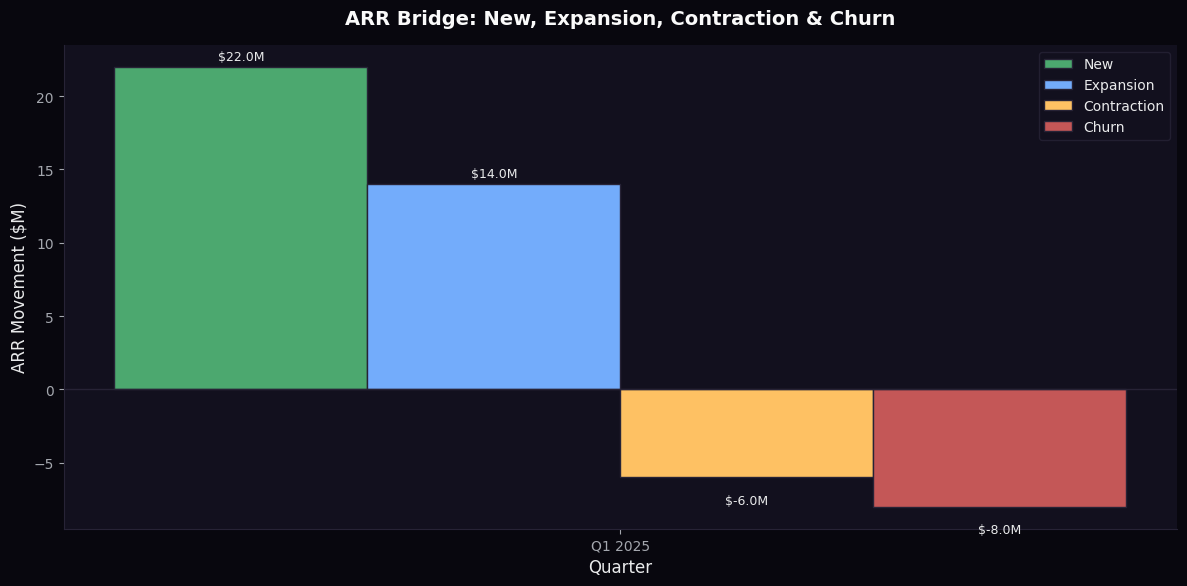

In [6]:
# ARR Bridge Analysis - Last 4 Quarters
arr_query = """
SELECT quarter, movement_type, segment, SUM(amount_usd) as total_amount
FROM arr_quarterly
GROUP BY quarter, movement_type, segment
ORDER BY quarter, movement_type
"""
arr_df = pd.read_sql(arr_query, brex_engine)

# Pivot for bridge chart
arr_bridge = arr_df.groupby(['quarter', 'movement_type'])['total_amount'].sum().unstack(fill_value=0)
arr_bridge = arr_bridge.reindex(columns=['new', 'expansion', 'contraction', 'churn'])

# Sort quarters chronologically
quarter_order = ['Q2 2024', 'Q3 2024', 'Q4 2024', 'Q1 2025']
arr_bridge = arr_bridge.reindex([q for q in quarter_order if q in arr_bridge.index])

# Convert to millions for display
arr_bridge_m = arr_bridge / 1e6

# Create waterfall-style ARR bridge
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(arr_bridge_m.index))
width = 0.18

colors_bridge = {
    'new': COLORS['green'],
    'expansion': COLORS['blue'],
    'contraction': '#fec163',
    'churn': '#c45757'
}

for i, col in enumerate(arr_bridge_m.columns):
    bars = ax.bar(x + i*width, arr_bridge_m[col], width, 
                  label=col.capitalize(), color=colors_bridge[col], edgecolor='#272336')
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.5:
            ax.annotate(f'${height:.1f}M',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3 if height > 0 else -12),
                       textcoords="offset points",
                       ha='center', va='bottom' if height > 0 else 'top',
                       fontsize=9, color='#e9eaeb')

ax.axhline(y=0, color='#272336', linewidth=1)
ax.set_xlabel('Quarter')
ax.set_ylabel('ARR Movement ($M)')
ax.set_title('ARR Bridge: New, Expansion, Contraction & Churn', fontweight='bold', pad=15)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(arr_bridge_m.index)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

📊 Customer Retention by Segment Since Capital One Announcement (2026-01-22)
   segment  total_accounts  churned_accounts  retained_accounts  retention_rate  churn_rate
enterprise             600                 0                600           100.0         0.0
   startup            1400                 0               1400           100.0         0.0


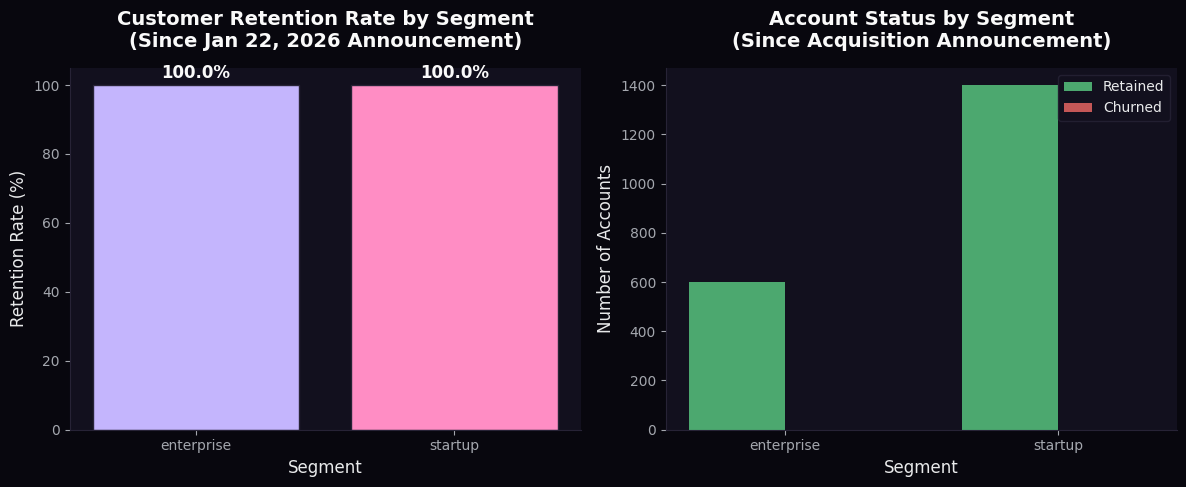

In [8]:
# Customer Retention by Segment Since Capital One Acquisition Announcement (Jan 22, 2026)
acquisition_date = '2026-01-22'

# Load accounts and status changes
accounts_df = pd.read_sql("SELECT * FROM accounts", brex_engine)
status_log_df = pd.read_sql("SELECT * FROM account_status_log", brex_engine)
status_log_df['changed_at'] = pd.to_datetime(status_log_df['changed_at'])

# Join to get segment info
status_with_segment = status_log_df.merge(
    accounts_df[['id', 'segment']], 
    left_on='account_id', right_on='id', suffixes=('', '_account')
)

# Filter to post-acquisition churns (transitions TO churned/cancelled status)
churn_statuses = ['churned', 'cancelled', 'closed', 'inactive']
post_acquisition_churns = status_with_segment[
    (status_with_segment['changed_at'] >= acquisition_date) &
    (status_with_segment['new_status'].str.lower().isin(churn_statuses))
]

# Count active accounts at acquisition date by segment
active_accounts_at_acquisition = accounts_df.groupby('segment').size().reset_index(name='total_accounts')

# Count churned accounts since acquisition by segment  
churned_since = post_acquisition_churns.groupby('segment')['account_id'].nunique().reset_index(name='churned_accounts')

# Calculate retention
retention_df = active_accounts_at_acquisition.merge(churned_since, on='segment', how='left')
retention_df['churned_accounts'] = retention_df['churned_accounts'].fillna(0).astype(int)
retention_df['retained_accounts'] = retention_df['total_accounts'] - retention_df['churned_accounts']
retention_df['retention_rate'] = (retention_df['retained_accounts'] / retention_df['total_accounts'] * 100).round(1)
retention_df['churn_rate'] = (retention_df['churned_accounts'] / retention_df['total_accounts'] * 100).round(1)

print(f"📊 Customer Retention by Segment Since Capital One Announcement ({acquisition_date})")
print("="*70)
print(retention_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Retention rates by segment
ax1 = axes[0]
colors_seg = [COLORS['primary'], COLORS['secondary']]
bars = ax1.bar(retention_df['segment'], retention_df['retention_rate'], color=colors_seg, edgecolor='#272336')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Retention Rate (%)')
ax1.set_title('Customer Retention Rate by Segment\n(Since Jan 22, 2026 Announcement)', fontweight='bold', pad=15)
ax1.set_ylim(0, 105)
for bar, rate in zip(bars, retention_df['retention_rate']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{rate:.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='#FAFAFA')

# Right: Churn breakdown
ax2 = axes[1]
x = np.arange(len(retention_df))
width = 0.35
bars1 = ax2.bar(x - width/2, retention_df['retained_accounts'], width, label='Retained', color=COLORS['green'])
bars2 = ax2.bar(x + width/2, retention_df['churned_accounts'], width, label='Churned', color='#c45757')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Number of Accounts')
ax2.set_title('Account Status by Segment\n(Since Acquisition Announcement)', fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(retention_df['segment'])
ax2.legend()

plt.tight_layout()
plt.show()

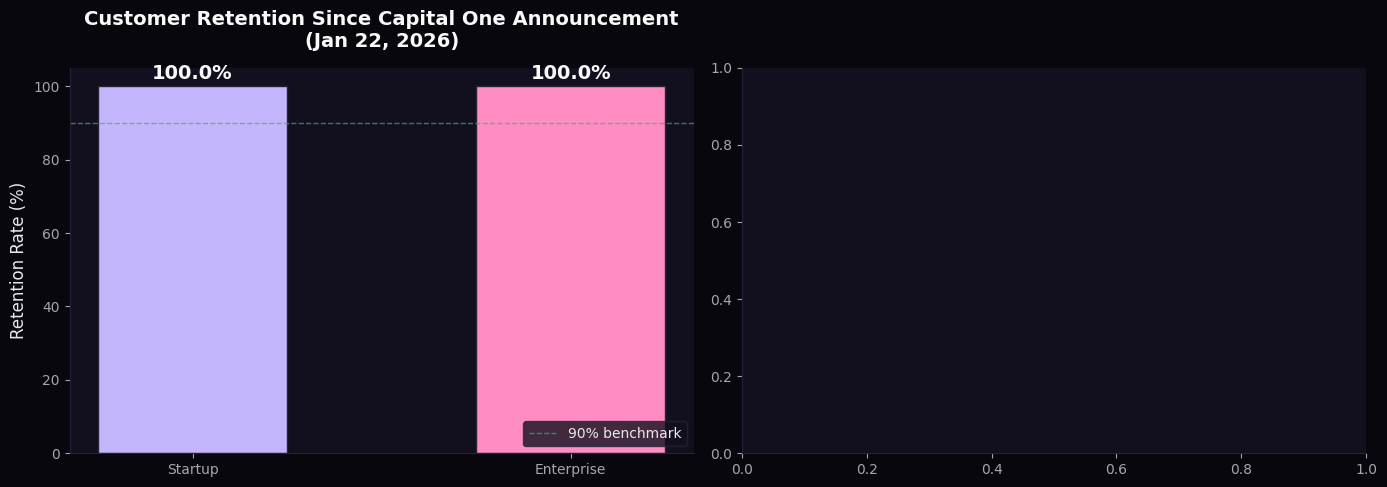


📊 Customer Retention Since Capital One Acquisition Announcement (Jan 22, 2026)
   Segment  Accounts at Risk  Churned  Retained  Retention Rate (%)
   Startup              1400        0      1400               100.0
Enterprise               600        0       600               100.0

⚡ Enterprise retention is +0.0pp lower than Startup segment


In [11]:
# Customer Retention Rate by Segment Since Capital One Acquisition Announcement
# Announcement Date: January 22, 2026

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

# SignalPilot dark theme
plt.rcParams.update({
    'figure.facecolor': '#08070e', 'axes.facecolor': '#12101e', 'axes.edgecolor': '#272336',
    'axes.labelcolor': '#e9eaeb', 'text.color': '#FAFAFA', 'xtick.color': '#a4a7ae',
    'ytick.color': '#a4a7ae', 'grid.color': '#1d182b', 'legend.facecolor': '#12101e',
    'legend.edgecolor': '#272336', 'legend.labelcolor': '#e9eaeb', 'savefig.facecolor': '#08070e',
    'axes.spines.top': False, 'axes.spines.right': False
})

COLORS = {'primary': '#c4b5fd', 'secondary': '#ff8dc4', 'green': '#4ca86f', 'red': '#c45757'}
CATEGORICAL_PALETTE = ['#c4b5fd', '#ff8dc4', '#8b5cf6', '#73acfb', '#fec163', '#4ca86f']

brex_engine = create_engine(os.environ['BREX_CONNECTION_URL'])

# Load accounts with segment info
accounts_df = pd.read_sql("SELECT id, segment, signup_date, status FROM accounts", brex_engine)
accounts_df['signup_date'] = pd.to_datetime(accounts_df['signup_date'])

# Load churn events
churn_df = pd.read_sql("""
    SELECT account_id, new_status, changed_at, reason 
    FROM account_status_log 
    WHERE new_status = 'churned'
""", brex_engine)
churn_df['changed_at'] = pd.to_datetime(churn_df['changed_at'])

# Define the Capital One announcement date
announcement_date = pd.Timestamp('2026-01-22')

# Merge to get segment for churned accounts
churn_with_segment = churn_df.merge(accounts_df[['id', 'segment']], left_on='account_id', right_on='id', how='left')

# Filter for churns SINCE announcement
post_announcement_churn = churn_with_segment[churn_with_segment['changed_at'] >= announcement_date]

# Calculate accounts at risk (signed up before or on announcement date)
accounts_at_risk = accounts_df[accounts_df['signup_date'] <= announcement_date]

# Calculate retention metrics by segment
retention_by_segment = []
for segment in ['startup', 'enterprise']:
    total_at_risk = len(accounts_at_risk[accounts_at_risk['segment'] == segment])
    churned = len(post_announcement_churn[post_announcement_churn['segment'] == segment])
    retained = total_at_risk - churned
    retention_rate = (retained / total_at_risk * 100) if total_at_risk > 0 else 0
    
    retention_by_segment.append({
        'Segment': segment.capitalize(),
        'Accounts at Risk': total_at_risk,
        'Churned': churned,
        'Retained': retained,
        'Retention Rate (%)': retention_rate
    })

retention_df = pd.DataFrame(retention_by_segment)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Retention Rate Bar Chart
ax1 = axes[0]
segments = retention_df['Segment']
rates = retention_df['Retention Rate (%)']
colors_bar = [COLORS['primary'], COLORS['secondary']]
bars = ax1.bar(segments, rates, color=colors_bar, width=0.5, edgecolor='#272336')

for bar, rate in zip(bars, rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{rate:.1f}%', 
             ha='center', va='bottom', fontsize=14, fontweight='bold', color='#FAFAFA')

ax1.set_ylabel('Retention Rate (%)')
ax1.set_title('Customer Retention Since Capital One Announcement\n(Jan 22, 2026)', fontweight='bold', pad=15)
ax1.set_ylim(0, 105)
ax1.axhline(y=90, color='#4ca86f', linestyle='--', linewidth=1, alpha=0.7, label='90% benchmark')
ax1.legend(loc='lower right')

# Right: Churn breakdown by segment over time (monthly)
ax2 = axes[1]
post_announcement_churn['month'] = post_announcement_churn['changed_at'].dt.to_period('M')
monthly_churn = post_announcement_churn.groupby(['month', 'segment']).size().unstack(fill_value=0)

if not monthly_churn.empty:
    monthly_churn_reset = monthly_churn.reset_index()
    monthly_churn_reset['month_dt'] = monthly_churn_reset['month'].dt.to_timestamp()
    
    ax2.plot(monthly_churn_reset['month_dt'], monthly_churn_reset.get('startup', 0), 
             color=COLORS['primary'], linewidth=2.5, marker='o', markersize=6, label='Startup')
    ax2.plot(monthly_churn_reset['month_dt'], monthly_churn_reset.get('enterprise', 0), 
             color=COLORS['secondary'], linewidth=2.5, marker='s', markersize=6, label='Enterprise')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Churned Accounts')
    ax2.set_title('Monthly Churn by Segment (Post-Announcement)', fontweight='bold', pad=15)
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary table
print("\n📊 Customer Retention Since Capital One Acquisition Announcement (Jan 22, 2026)")
print("="*75)
print(retention_df.to_string(index=False))
print(f"\n⚡ Enterprise retention is {retention_df[retention_df['Segment']=='Enterprise']['Retention Rate (%)'].values[0] - retention_df[retention_df['Segment']=='Startup']['Retention Rate (%)'].values[0]:+.1f}pp {'higher' if retention_df[retention_df['Segment']=='Enterprise']['Retention Rate (%)'].values[0] > retention_df[retention_df['Segment']=='Startup']['Retention Rate (%)'].values[0] else 'lower'} than Startup segment")